# AutoML tool

Creating an AutoML tool for loan prediction involves several steps. Below is a blueprint along with the required code snippets to guide you through the process. This uses the popular scikit-learn library in Python.

Blueprint for AutoML Tool

Load Data

Preprocess Data

Feature Engineering

Model Selection

Model Training

Model Evaluation

Model Deployment

Prediction

In [1]:
# Required Libraries
import numpy as np # for linear algebra
import pandas as pd # for data processing
import warnings # for warning handling
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for data visualization

from sklearn.metrics import accuracy_score # for evaluating model performance
from sklearn.pipeline import Pipeline # for creating machine learning pipelines
from sklearn.compose import ColumnTransformer # for applying different preprocessing steps to different feature subsets
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer # for handling missing values
from sklearn.preprocessing import OneHotEncoder, LabelEncoder # for encoding categorical variables
from sklearn.model_selection import train_test_split, GridSearchCV # for splitting data and hyperparameter tuning

# ML models
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree classifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier # ensemble classifiers

# for warning handling
warnings.filterwarnings("ignore")


DATA INGESTION MODULE
i.e. data loading from the loan dataset.csv file

In [2]:
df_train = pd.read_csv('train_loan_dataset.csv')
df_test = pd.read_csv('test_loan_dataset.csv')
print(f'Train_dataset having {(len(df_train))} rows')
print(f'Test_dataset having {(len(df_test))} rows')

Train_dataset having 614 rows
Test_dataset having 367 rows


DATA PREPROCESSING MODULE

Handle Missing Values: Implement strategies to handle missing data.

Encode Categorical Variables: Convert categorical variables into numerical representations.


In [3]:
#display the first five row 
df_train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
print(f"training dataset (row, col) is {df_train.shape}\n\ntesting dataset (row, col) is {df_test.shape}")


training dataset (row, col) is (614, 13)

testing dataset (row, col) is (367, 12)


In [6]:
# column information using info()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# describing the dataset 'summary statistics'
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# checking the missing values

missing_count=df_train.isnull().sum().sort_values(ascending=True)
print(missing_count)


Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
Married               3
Gender               13
Loan_Amount_Term     14
Dependents           15
LoanAmount           22
Self_Employed        32
Credit_History       50
dtype: int64


HERE WE HAVE SEEN THAT CREDIT_HISTORY HAS HIGHEST MISSING VALUES I.E. 13

FOLLOWED BY SELF_EMPLOYED(10),lOANAMOUNT(10)..

In [9]:
# dropping the col which is not needed from both the dataset (training snd testing)
# inplace used bcz modified the original dataframe without returning the new dataframe

df_train.drop(columns='Loan_ID',axis=1,inplace=True)
df_test.drop(columns='Loan_ID',axis=1,inplace=True)
# after modification 

print("for training set (row,col) {} ".format(df_train.shape))
print("for testing set (row,col) {}".format(df_train.shape))

for training set (row,col) (614, 12) 
for testing set (row,col) (614, 12)


In [10]:
# filling the missing values inside the dataframe

# df_train is our DataFrame
# Filling numerical columns with mode
num_cols = df_train.select_dtypes(include=['float64', 'int64']).columns
df_train[num_cols] = df_train[num_cols].fillna(df_train[num_cols].median())

# Filling categorical columns with mode (if any)
catg_cols = df_train.select_dtypes(include=['object']).columns
df_train[catg_cols] = df_train[catg_cols].fillna(df_train[catg_cols].mode().iloc[0])



In [11]:
df_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

HERE ALL THE MISSING VALUED IS FILLED BY MEDIAN(numeric) AND MODE(categorical)

In [12]:
# data visualizaton

num_ = df_train.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat_ = df_train.select_dtypes('object').columns.to_list()

#numeric dataframe

loan_num =  df_train[num_]
#categoric dataframe
loan_cat = df_train[cat_]



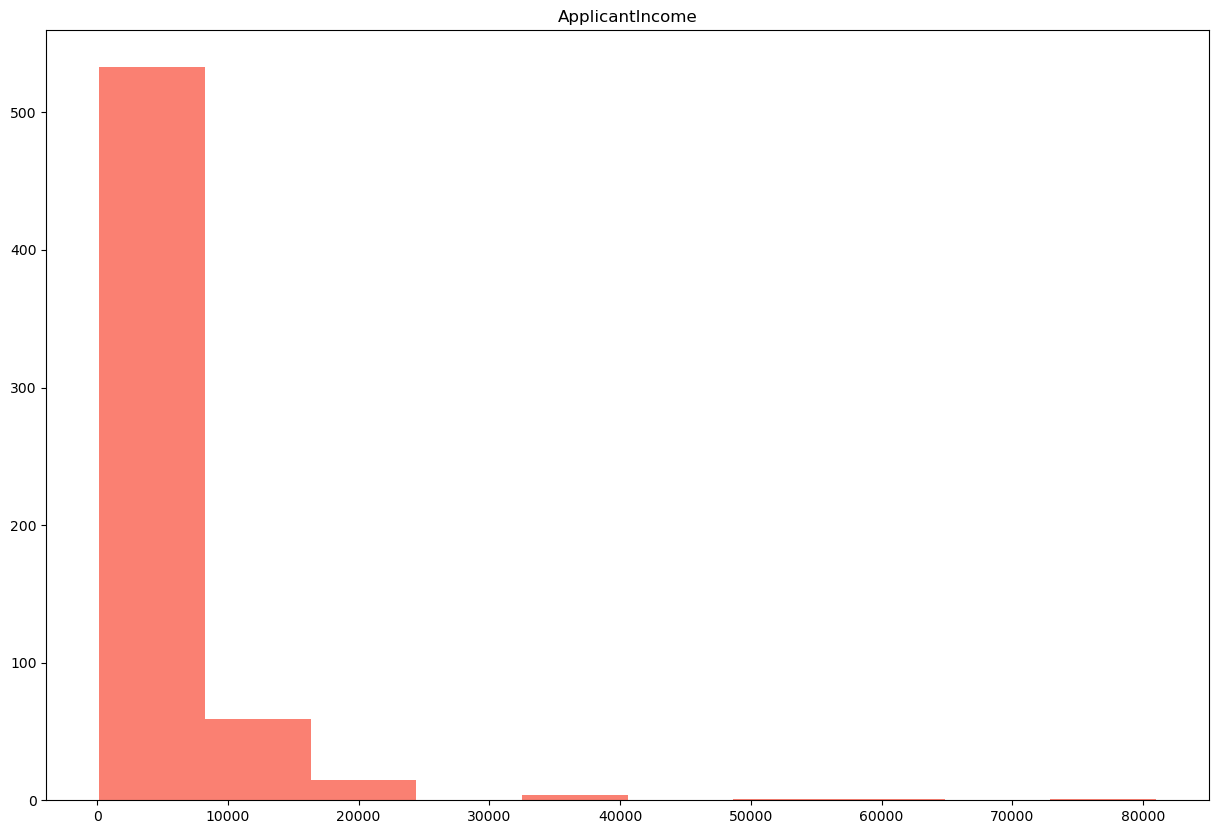

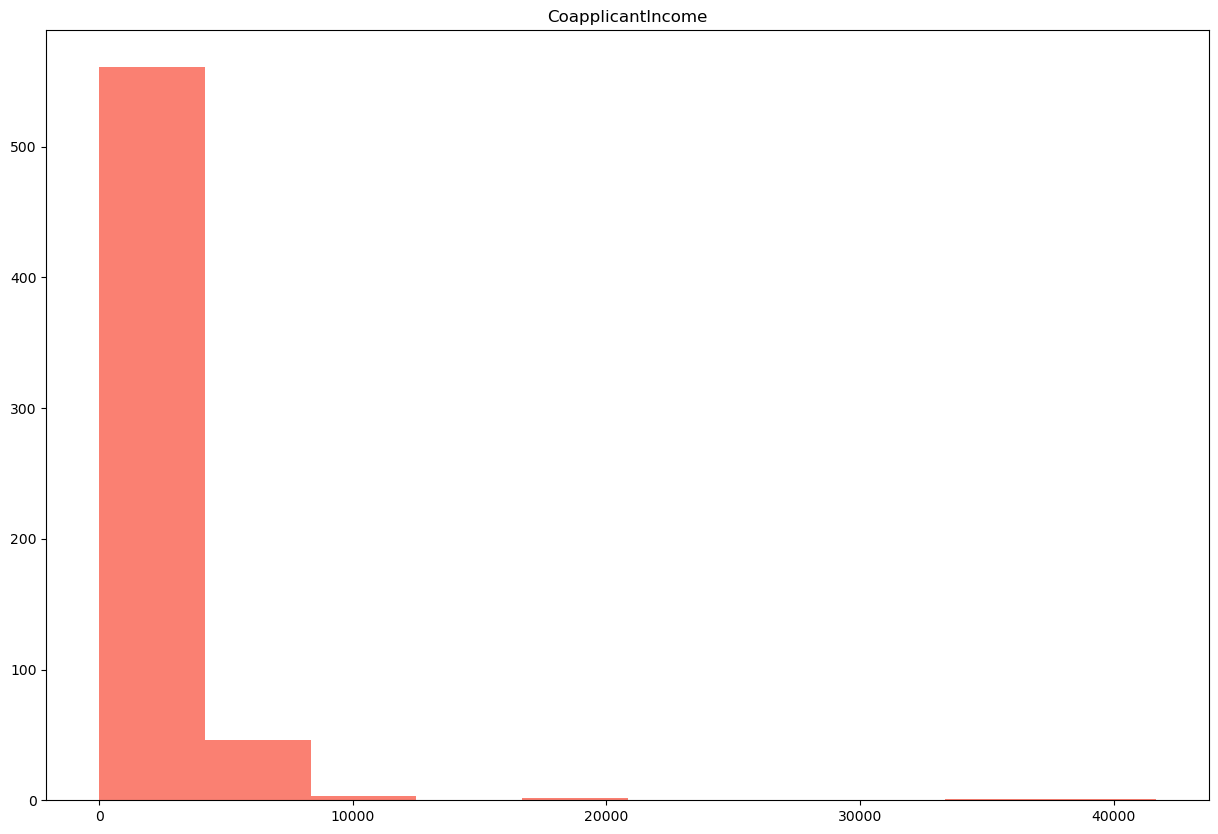

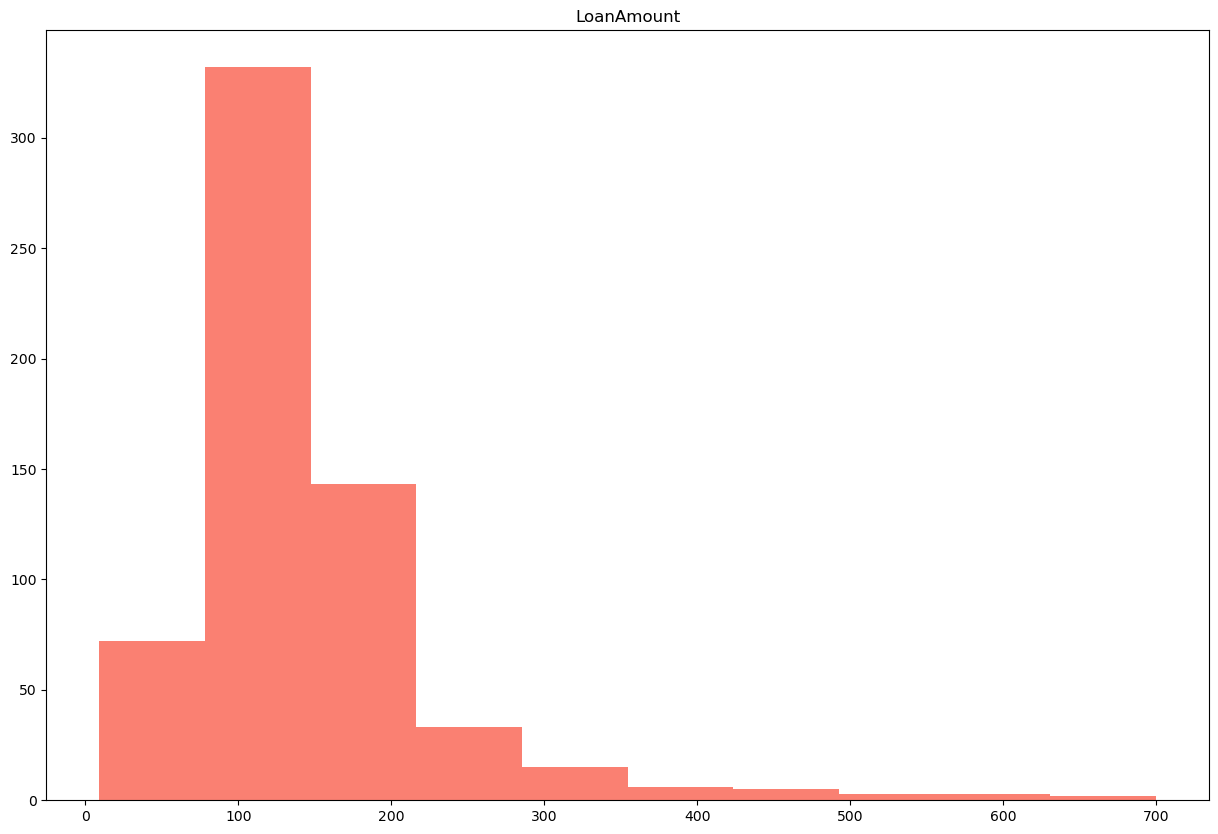

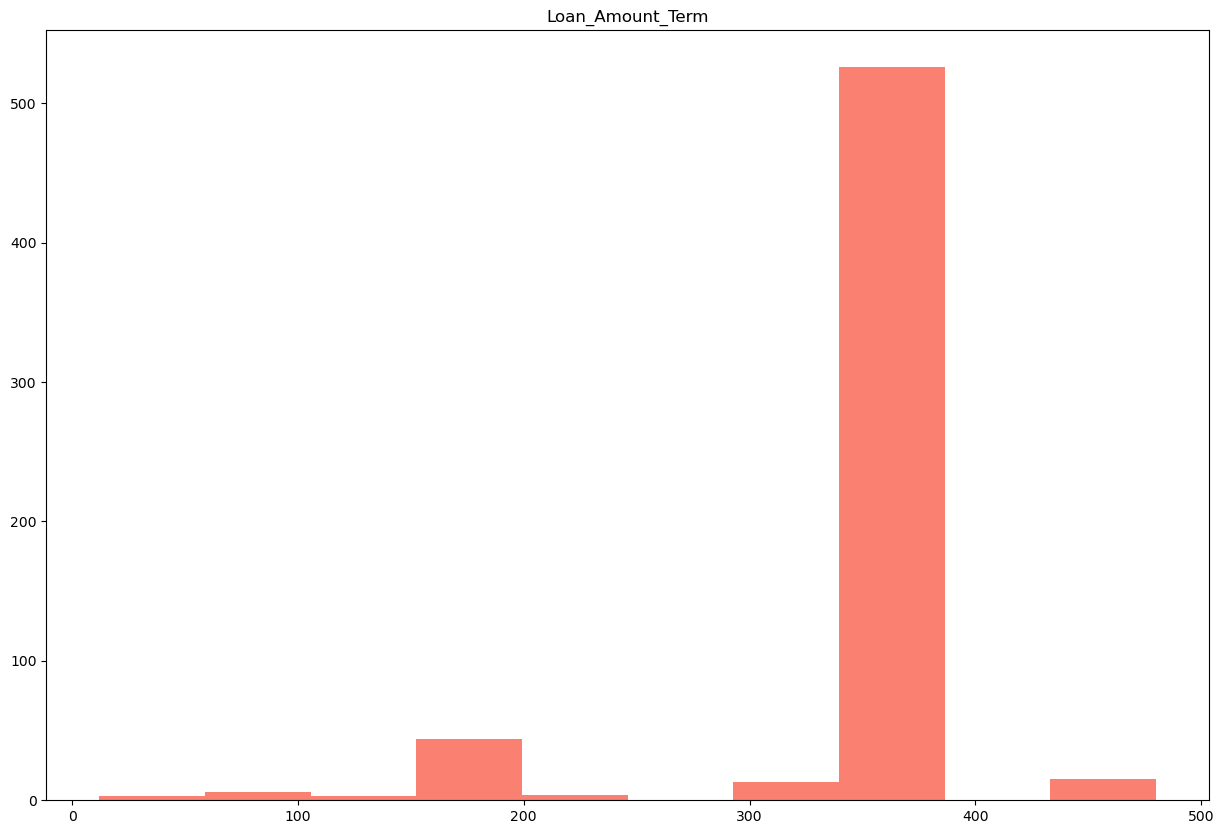

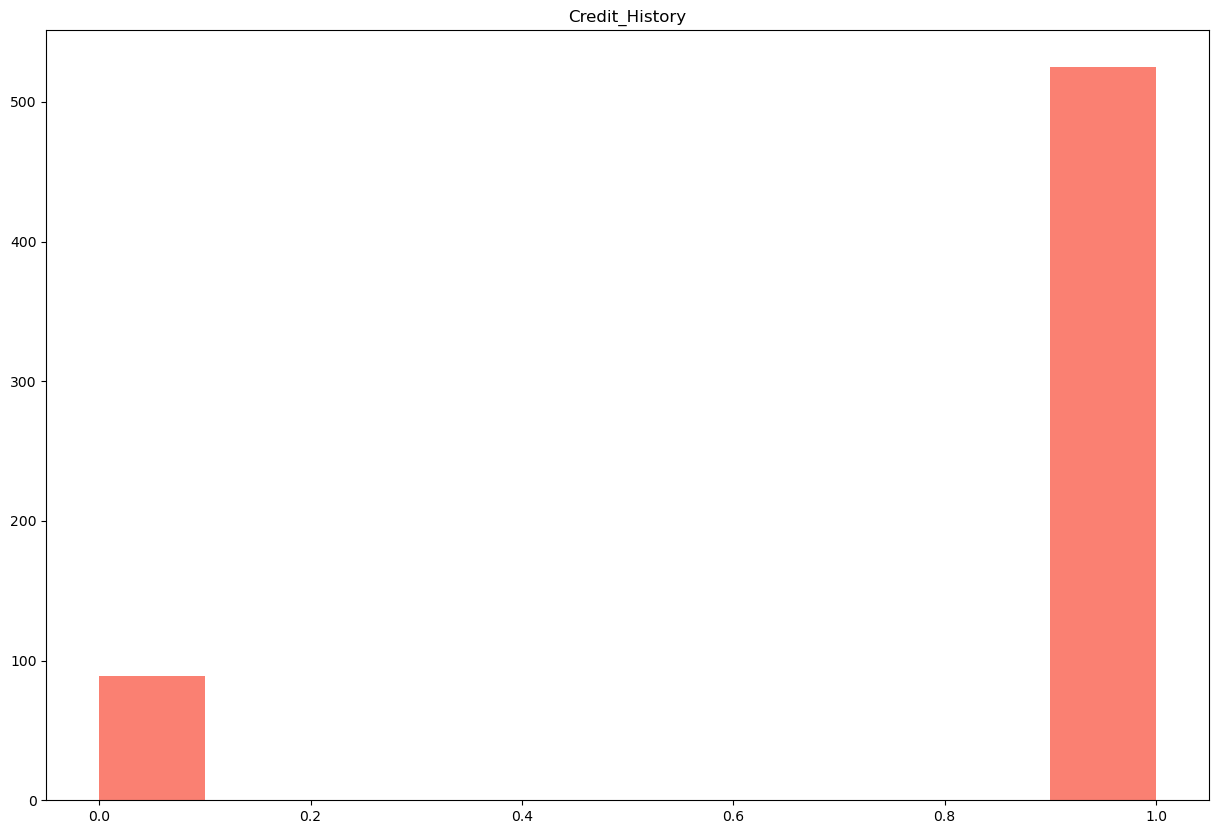

In [13]:
for i in loan_num:
    plt.figure(figsize=(15,10))
    plt.hist(loan_num[i],color='salmon')
    plt.title(i)
    plt.show()

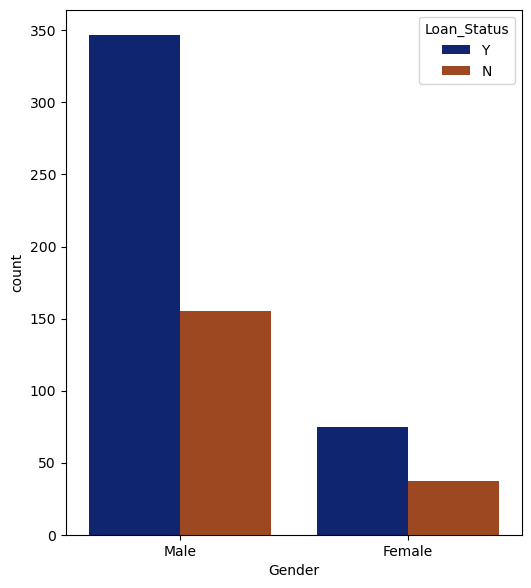

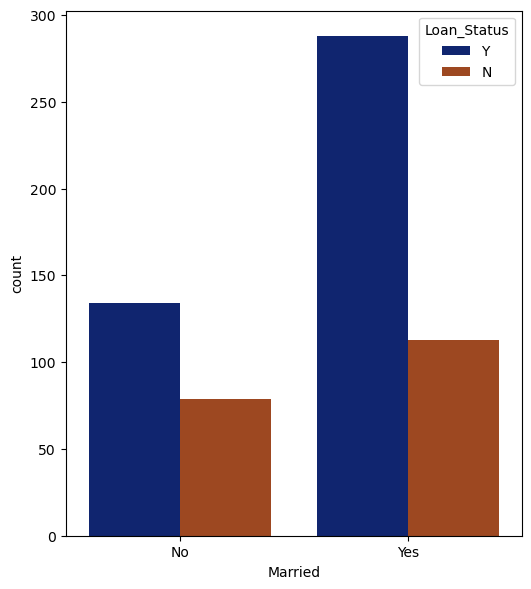

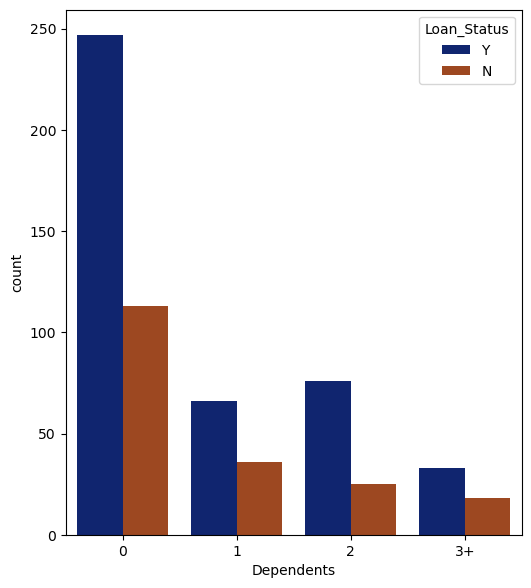

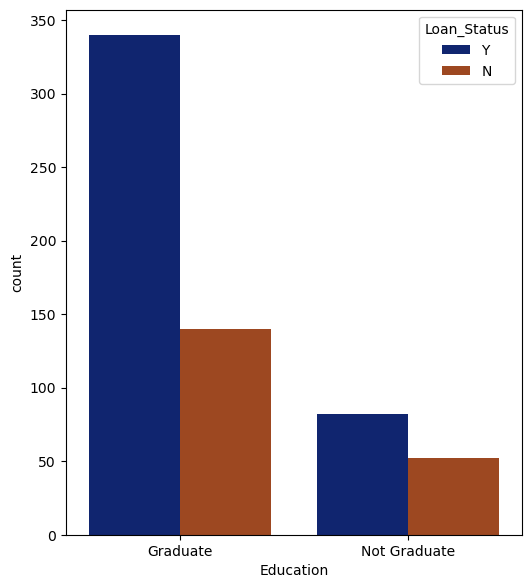

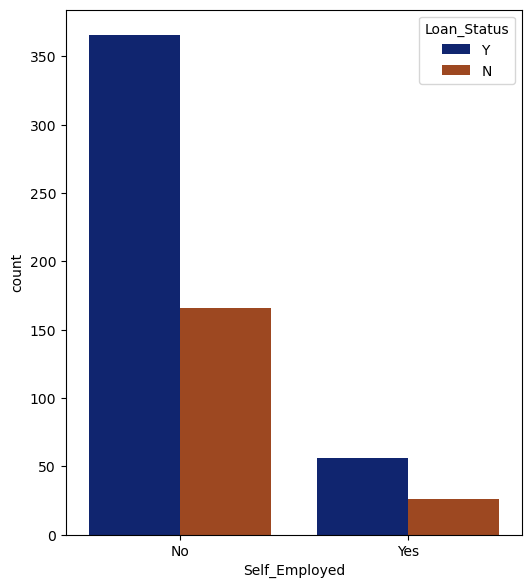

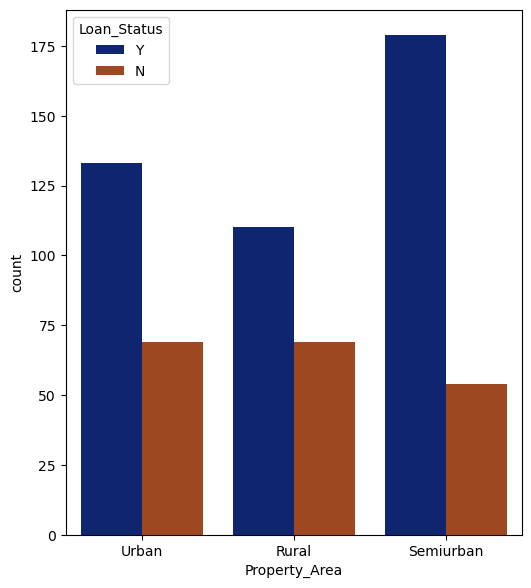

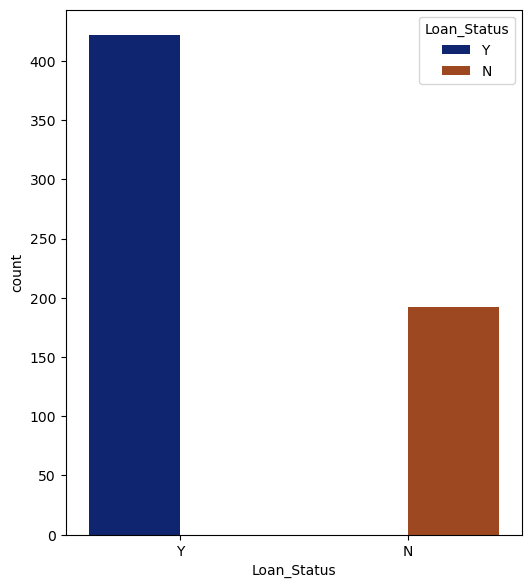

In [14]:
for j in cat_:
    plt.figure(figsize=(20,15))
    plt.subplot(2,3,1)
    sns.countplot(x=j,hue='Loan_Status',data=df_train ,palette='dark')
    plt.xlabel(j, fontsize=10)

In [15]:
x = df_train.drop(['Loan_Status'], axis=1)
y = df_train['Loan_Status']

<Axes: xlabel='Education', ylabel='LoanAmount'>

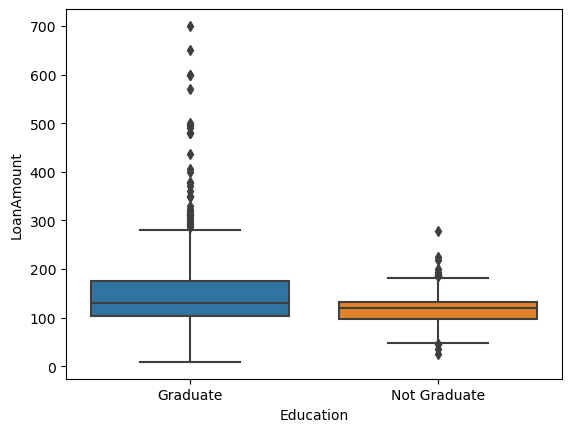

In [16]:
sns.boxplot(x='Education',y='LoanAmount',data=df_train)

@ graduates having more loan than the non graduates

In [17]:
# defining pipelines

categ_transformer = Pipeline(steps = [('simp_imputer',SimpleImputer(strategy='most_frequent')),
('onehot_encdr', OneHotEncoder())])
                                           

nume_transformer = Pipeline(steps = [('iter_imputer', IterativeImputer())])




In [18]:
def split(df):
    """
   fn to split datainto two ,,numerical and categorical
    df : dataframe
            pass in full dataframe
    Returns: 
        dataframe with categorical columns
        dataframe with numerical columns
    """
    categorical_col = []
    numerical_col = []
    for c in df.columns:
        if df[c].dtype =='object':
            categorical_col.append(c)
        else:
            numerical_col.append(c)
    return df[categorical_col], df[numerical_col]

# here creating categorical train dataset and numerical train dataset
cate_train_df, num_train_df = split(x)

# here extracting the categroical column names and numerical column names
cat_train_features = cate_train_df.columns
num_train_features = num_train_df.columns

In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', nume_transformer, num_train_features),
        ('cat', categ_transformer, cat_train_features)
        ])

In [20]:
x_train,x_test, y_train, y_test = train_test_split(x,y, train_size=0.7,test_size=0.3, random_state=42)
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train = pd.Series(lb.fit_transform(y_train))
y_test = pd.Series(lb.transform(y_test))

MODELLING SELECTION 

In [21]:
rand_fore = Pipeline(steps = [('preprocessor',preprocessor),
                      ('classifier', RandomForestClassifier() )])

In [22]:
rand_fore.fit(x_train, y_train)
y_pred = rand_fore.predict(x_test)
print('Train set score : ', rand_fore.score(x_train, y_train))
print('Test set score : ', accuracy_score(y_test,y_pred))

Train set score :  1.0
Test set score :  0.772972972972973


In [23]:
classifier = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
    ]

scores= []
for clas_f in classifier:
    pie_ = Pipeline(steps=[('preprocessor', preprocessor),
                          ('clas_f', clas_f)])
    pie_.fit(x_train, y_train)   
    scores.append(pie_.score(x_test, y_test))

           models    scores
0             knn  0.562162
1   decision tree  0.697297
2   random forest  0.772973
3  gradient boost  0.756757


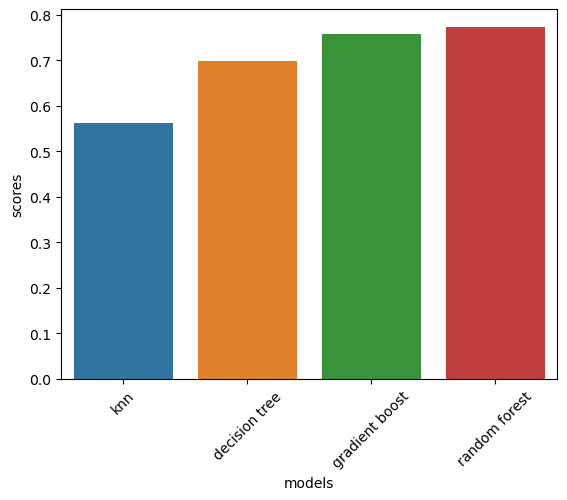

In [24]:
model = [
    'knn',
    'decision tree',
    'random forest', 
    'gradient boost']
df___x = pd.DataFrame(list(zip(model,scores)), columns=['models','scores'])
print(df___x)
sns.barplot(x='models', y='scores', data=df___x.sort_values(by='scores'), )
plt.xticks(rotation=45)
plt.show()

modelling with grid search

In [25]:

# List of classifiers to evaluate
models = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

# Corresponding parameter grids for each classifier
param_grids = [
    {'classifier__n_neighbors': [2, 3, 4, 5]},
    {'classifier__max_features': ['sqrt', 'log2'], 'classifier__max_depth': [4, 5, 6, 7, 8]},
    {'classifier__n_estimators': [200, 500], 'classifier__max_features': ['auto', 'sqrt', 'log2'], 'classifier__max_depth': [4, 5, 6, 7, 8], 'classifier__criterion': ['gini', 'entropy']},
    {'classifier__n_estimators': [200, 500]},
    {'classifier__learning_rate': [0.1, 0.01, 0.001]}
]

# Lists to store the results
best_params_list = []
best_scores_list = []

# Loop through classifiers and parameter grids
for model, param_grid in zip(models, param_grids):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, n_jobs=1)
    grid_search.fit(x_train, y_train)
    
    best_params_list.append(grid_search.best_params_)
    best_scores_list.append(grid_search.best_score_)

# Display the best parameters and scores for each classifier
print("Best Parameters:", best_params_list)
print("Best Scores:", best_scores_list)


Best Parameters: [{'classifier__n_neighbors': 5}, {'classifier__max_depth': 5, 'classifier__max_features': 'log2'}, {'classifier__criterion': 'gini', 'classifier__max_depth': 4, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 200}, {'classifier__n_estimators': 200}, {'classifier__learning_rate': 0.01}]
Best Scores: [0.6737893296853625, 0.7855266757865937, 0.818139534883721, 0.7877975376196991, 0.8134883720930233]


          models    scores
0            knn  0.562162
1  decision tree  0.697297
2  random forest  0.772973
3      ada boost  0.756757


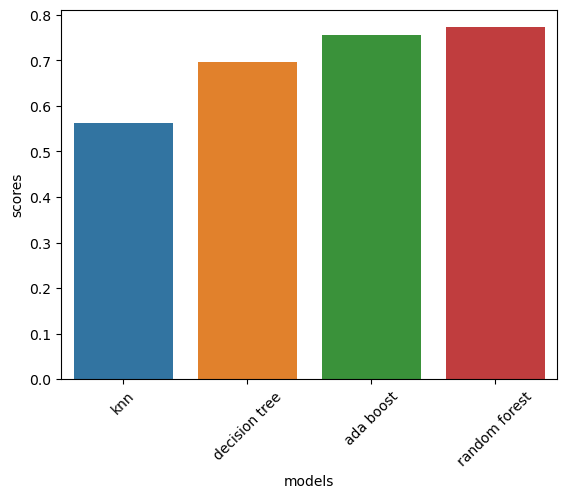

In [26]:
model = ['knn','decision tree', 'random forest', 'ada boost', 'gradient boost']
df_x = pd.DataFrame(list(zip(model,scores)), columns=['models','scores'])
print(df_x)
sns.barplot(x='models', y='scores', data=df_x.sort_values(by='scores'))
plt.xticks(rotation=45)
plt.show()

 $ hence random forest  is showing better score than other models

we will use it to estimate the loan status of the test dataset

In [27]:
rand_fore_param = best_params_list[3]
print(rand_fore_param)

{'classifier__n_estimators': 200}


In [28]:
from sklearn.metrics import classification_report

def evaluate_model(model, x_test, y_test):
    predictions = model.predict(X_test)
    return classification_report(y_test, predictions)


PRODUCTION MODEL

hence Since the accuracy of tuned random_forest model is better than any model, we will use it to estimate the loan_status of the test set

In [29]:
import pickle
rand_f = Pipeline(steps = [('preprocessor',preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators= 200))])
rand_f.fit(x, y)
y_pred = rand_f.predict(df_test)

pickle_filename = 'loan_prediction_model.pkl'
with open(pickle_filename, 'wb') as file:
    pickle.dump(rand_f, file)

print(f"Model saved to {pickle_filename}")


Model saved to loan_prediction_model.pkl


In [30]:
y_pred_series = pd.Series(y_pred)
d = pd.concat([df_test, pd.DataFrame(y_pred_series)], axis=1)
d

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,0
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Y
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,Y
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,N
